# Study case: compare time related counts data

In this notebook we first generate count data per businessday at several locations over two years. Then we merge the two years into one dataframe. We resample the data to monthly means by end of month frequencies. After that we display the data to compare the average month count of the two years.


author Fenna Feenstra

In [1]:

from bokeh.io import output_file, show
from bokeh.io import output_notebook
import pandas as pd
import numpy as np
output_notebook()

Loading BokehJS ...

## Pandas datetime

pandas stores timestamps using NumPy’s datetime64 data type at the nanosecond resolution. We can demonstrate this by creating a pandas series object with a data range in nanosecond frequency 

In [2]:
#pd.date_range?

In [3]:
#pd.Series(pd.date_range('2021-07-01', periods=3, freq='D')) # day
#pd.Series(pd.date_range('2021-07-01', periods=3, freq='H')) # hour
pd.Series(pd.date_range('2021-07-01', periods=3, freq='N')) # nanosecond

0   2021-07-01 00:00:00.000000000
1   2021-07-01 00:00:00.000000001
2   2021-07-01 00:00:00.000000002
dtype: datetime64[ns]

We see that the pandas series object is of the dtype `datetime64[ns]` (ns = nanoseconds)

## Create date_range

With date_range we can create all sorts of time intervals 
For example, if you wanted a date index containing the last business day of each month, you would pass the 'BM' frequency (business end of month)

In [4]:
dates = pd.date_range('1/1/2021', periods = 3, freq='BM')
pd.Series(dates)

0   2021-01-29
1   2021-02-26
2   2021-03-31
dtype: datetime64[ns]

Another example is a 2hour period

In [5]:
dates = pd.date_range('1/1/2021', periods = 3, freq='2h')
pd.Series(dates)

0   2021-01-01 00:00:00
1   2021-01-01 02:00:00
2   2021-01-01 04:00:00
dtype: datetime64[ns]

In the https://pandas.pydata.org/docs/reference/offset_frequency.html you can find more about frequencies and in the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html you can read all the methods of this datetime object. 

## Create time related count data

Let us create some time related data. The data represent counts per business days at several locations


In [6]:
N = 250 #there are about 250 business days in a year
locations=['Assen', 'Groningen', 'Hoogeveen']
dates20 = pd.date_range('1/1/2019', periods=N, freq='B')
count20 = pd.DataFrame(np.random.randint(7,33 ,size=(N, len(locations))), index=dates20, columns = locations)
dates21 = pd.date_range('1/1/2020', periods=N, freq='B')
count21 = pd.DataFrame(np.random.randint(10,40 ,size=(N, len(locations))), index=dates21, columns = locations)
#concatenate the two dataframes
counts = pd.concat([count20, count21])

In [7]:
counts.head(2)

,Assen,Groningen,Hoogeveen
2019-01-01,12,17,8
2019-01-02,24,8,7


In [8]:
counts.tail(2)

,Assen,Groningen,Hoogeveen
2020-12-14,26,28,25
2020-12-15,33,12,32


In [9]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2019-01-01 to 2020-12-15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Assen      500 non-null    int64
 1   Groningen  500 non-null    int64
 2   Hoogeveen  500 non-null    int64
dtypes: int64(3)
memory usage: 15.6 KB


In [10]:
counts.describe().T #returns descriptive stats (transposed)

,count,mean,std,min,25%,50%,75%,max
Assen,500.0,21.952,8.973223,7.0,14.0,21.0,29.25,39.0
Groningen,500.0,21.934,8.185331,7.0,15.0,22.0,28.00,39.0
Hoogeveen,500.0,22.042,8.554683,7.0,14.0,22.0,29.00,39.0


## Plot the counts data
We can plot the data just by calling `pandas.DataFrame.plot()`

array([[<AxesSubplot:title={'center':'Assen'}>,
        <AxesSubplot:title={'center':'Groningen'}>],
       [<AxesSubplot:title={'center':'Hoogeveen'}>, <AxesSubplot:>]],
      dtype=object)

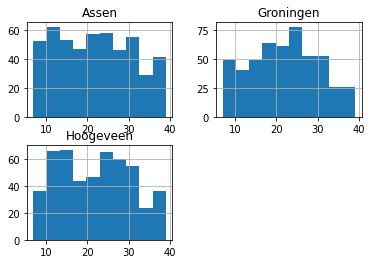

In [11]:
counts.hist()

<AxesSubplot:>

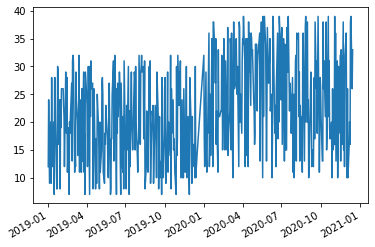

In [12]:
#plot the counts of Assen
counts['Assen'].plot()

## Resample

This data is not readable. We should consider Resampling. Resampling is necessary when you’re given a data set recorded in some time interval and you want to change the time interval to something else. For example, aggregate daily numbers into monthly numbers. The syntax 

    <DataFrame or Series>.resample(arguments).<aggregate function>

In [13]:
month_counts = counts.resample('M').sum() #create a dataframe with the total sales per month
month_counts.tail()

,Assen,Groningen,Hoogeveen
2020-08-31,556,479,560
2020-09-30,490,538,488
2020-10-31,495,514,474
2020-11-30,519,496,570
2020-12-31,251,268,295


In [14]:
year_counts = counts.resample('Y').sum()
year_counts.describe()

,Assen,Groningen,Hoogeveen
count,2.000000,2.000000,2.000000
mean,5488.000000,5483.500000,5510.500000
std,1107.329219,884.590583,853.477885
min,4705.000000,4858.000000,4907.000000
25%,5096.500000,5170.750000,5208.750000
50%,5488.000000,5483.500000,5510.500000
75%,5879.500000,5796.250000,5812.250000
max,6271.000000,6109.000000,6114.000000


<AxesSubplot:>

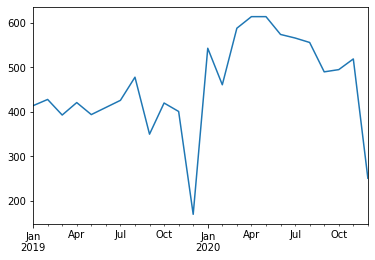

In [15]:
month_counts['Assen'].plot()

We can also resample to evaluate a part of the dataset. For instance we could get the mean value of Assen en Hoogeveen combined

In [16]:
# get mean of Drenthe counts
month_counts_drenthe = counts.resample('M').mean().eval('Assen+Hoogeveen')
print(month_counts_drenthe.head())
#create a dataframe from the series
msd = pd.DataFrame({'date':month_counts_drenthe.index, 'average':month_counts_drenthe.values}).set_index('date')
print(msd.head())

2019-01-31    38.434783
2019-02-28    42.750000
2019-03-31    38.571429
2019-04-30    37.318182
2019-05-31    35.739130
Freq: M, dtype: float64
              average
date                 
2019-01-31  38.434783
2019-02-28  42.750000
2019-03-31  38.571429
2019-04-30  37.318182
2019-05-31  35.739130


<AxesSubplot:xlabel='date'>

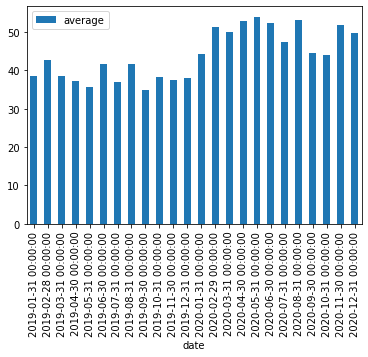

In [17]:
msd.plot(kind = 'bar')


## Locators and Formatters using matplotib

This is not the kind of plot we want. Remember we can access the objects of the figure. The two relevant classes are Locators and Formatters. Locators determine where the ticks are, and formatters control the formatting of tick labels.

In [18]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter

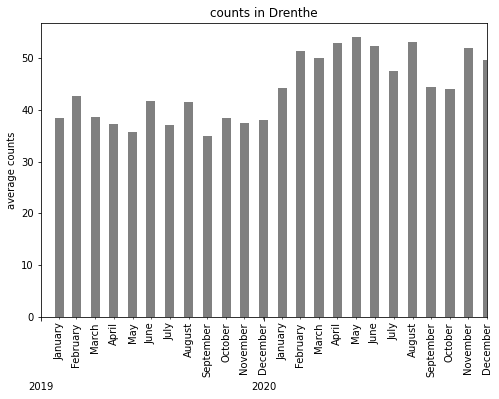

In [19]:
plt.figure(figsize=(8, 6))
#ax = plt.gca(), figure = plt.gcf()

#adjust titles and labels
plt.title('counts in Drenthe')
plt.ylabel('average counts')

#adjust thick labels
plt.gca().xaxis.set_minor_formatter(DateFormatter('%B')) #display name of month
plt.gca().xaxis.set_minor_locator(MonthLocator(interval=1, bymonthday=-1)) #every months end of month
plt.gca().xaxis.set_major_formatter(DateFormatter('\n\n\n\n\n%Y')) #display year
plt.gca().xaxis.set_major_locator(YearLocator()) 
#plot
plt.bar(x = msd.index, height = msd['average'], width = 15, color = 'grey')
# adjust limit
plt.gca().set_xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2020-12-31'))
# auto rotate
plt.gcf().autofmt_xdate(rotation=90, which = 'minor', ha="center")
plt.show()

However, we want to compare the different dates over the year per year. Let's pivot the table

In [20]:
msd = msd.reset_index().rename(columns={'date':'date_end'})
msd['year'] = msd.date_end.dt.year
msd['month'] = msd.date_end.dt.month
print(msd.head())
df = msd.pivot(index='month', columns='year', values='average')
df_pivoted = df.copy()

    date_end    average  year  month
0 2019-01-31  38.434783  2019      1
1 2019-02-28  42.750000  2019      2
2 2019-03-31  38.571429  2019      3
3 2019-04-30  37.318182  2019      4
4 2019-05-31  35.739130  2019      5


In [21]:
#reset index to get tidy table
df = df.reset_index()
print(df.columns)

Index(['month', 2019, 2020], dtype='object', name='year')


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
month,12.0,6.500000,3.605551,1.000000,3.750000,6.500000,9.250000,12.000000
2019,12.0,38.485756,2.406670,34.857143,37.238636,38.195652,39.326299,42.750000
2020,12.0,49.624818,3.694032,44.045455,46.689723,50.627273,52.545455,54.047619


In [23]:
#change numbers to month name
def format_months(i):
    l = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return l[i-1]

df['month'] = df['month'].apply(format_months)
print(df.head(3))


year month       2019       2020
0      Jan  38.434783  44.260870
1      Feb  42.750000  51.300000
2      Mar  38.571429  49.954545


<AxesSubplot:title={'center':'counts in Drenthe'}, xlabel='month', ylabel='average counts'>

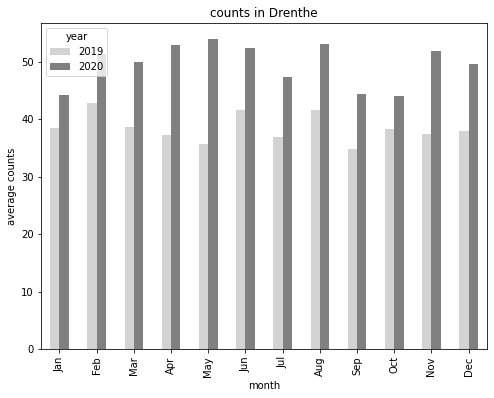

In [24]:
df.plot(x = 'month', 
              y=[2019, 2020], 
              kind = 'bar', 
              color = ['lightgrey', 'grey'], 
              ylabel='average counts', 
              title='counts in Drenthe', 
              figsize=(8, 6))

# The bokeh way
The example above is an example of grouped bar chart. Bokeh can handle up to three levels of nested (hierarchical) categories, and will automatically group output according to the outermost level. To specify neted categorical coordinates, the columns of the data source should contain tuples, for example:

x = [ ("jan", "2019"), ("jan", "2020"), ("feb", "2019"), ("feb", "2020), ... ]

Furthermore we need some styling https://docs.bokeh.org/en/latest/docs/user_guide/styling.html



In [25]:
from bokeh.models import FactorRange # needed for grouped data
from bokeh.transform import factor_cmap #import colormap for factors
from bokeh.models import Legend, LegendItem #import legend object
from bokeh.models import ColumnDataSource #import columndatasource for plotting data
from bokeh.plotting import figure #import plotting figure canvas

#preprocces data to columndatsource in the grouped format
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = ['2019', '2020']     
#create a tuple format for the group display
x = [ (month, year) for month in months for year in years ] # this creates [ ("jan", "2019"), ("jan", "2020"),...]
counts = sum(zip(df[2019].tolist(), df[2020].tolist()), ()) 
source = ColumnDataSource(data=dict(x=x, counts=counts))

#define color palette to be used
palette = ['lightgrey', 'grey'] #to color the bars


#create the figure area
p = figure(x_range=FactorRange(*x),  
           y_range= df[[2019,2020]].max() + 10,
           tools = "", 
           toolbar_location=None, 
           height = 350, 
           title="sales by Year")

p.title.align = "center" #align the title

#add the barchart
b = p.vbar(x='x', #x -axis values
           top='counts', # y-axis values
           width=1, 
           source=source,
           fill_color=factor_cmap('x', palette=palette, factors=years, start =1, end = 2), #fill color of the bar
           line_color = 'white') #white line of the bars


#set the labels with normal font
p.xaxis.axis_label = "month"
p.xaxis.axis_label_text_font_style = "normal"
p.yaxis.axis_label = "count"
p.yaxis.axis_label_text_font_style = "normal"


#add a custom legend
legend = Legend(items=[
    LegendItem(label="2019", renderers=[b], index=0),
    LegendItem(label="2020", renderers=[b], index=1), 
])
p.add_layout(legend)
p.legend.location = "top_right" # display legend in top right corner
p.legend.title = "years" # add a title to your legend
p.legend.title_text_font_style = "normal" #font style
p.legend.background_fill_alpha = 0.5 #make legend transparant

#ticks setup. First we disable the major tick (2019 and 2020 tick) 
#then we make sure that the group label (month) is dsplayed vertical
p.xaxis.major_label_text_font_size = '0pt'  # turn off x-axis tick labels
p.xaxis.major_tick_line_color = None  # turn off x-axis major ticks
p.yaxis.minor_tick_line_color = None  # turn off y-axis minor ticks
p.xaxis.group_label_orientation = "vertical"

#set the display margins
p.y_range.start = 0 #start directly with bar from the horizontal x-axis
p.x_range.range_padding = 0.05 #some margin from the y-axis

#disable grid
p.xgrid.grid_line_color = None #do not display grid

show(p)

see also https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

## Make it interactive using panel

We can make this plot interactive using panel. we need to reformat our print `function` to a general function that can handle year 2019, 2020 or both and we need to create a `widget` to select the years. We will make a grid `layout` to display the widget, the plot and the table. First we make sure we can run the panel form the notebook by `panel.extension()`

Important! If you use matplotlib instead of bokeh or holov you must make sure to return an interactive plot using `pn.pane.Matplotlib(fig)`

In [26]:
import panel as pn
pn.extension()

In [27]:
#generalize function
def plot_b(location = " Drenthe", years = ['2020']):
      
    #preprocces data to columndatsource in the grouped format
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    #create a tuple format for the group display
    x = [ (month, year) for month in months for year in years ] # this creates [ ("jan", "2019"), ("jan", "2020"),...]
    
    if len(years) > 1:
        counts = sum(zip(df[2019].tolist(), df[2020].tolist()), ()) 
    else:
        counts = tuple(df[int(years[0])].tolist())

                     
    source = ColumnDataSource(data=dict(x=x, counts=counts))

    #define color palette to be used
    palette = ['lightgrey', 'grey'] #to color the bars
    start_color = {'2019':1,'2020':2}


    #create the figure area
    p = figure(x_range=FactorRange(*x),  
           y_range= df[[2019,2020]].max() + 10,
           tools = "", 
           toolbar_location=None, 
           height = 350, 
           title=f"counts by Year in {location}")

    p.title.align = "center" #align the title

    start = start_color[years[0]]
    #add the barchart
    b = p.vbar(x='x', #x -axis values
           top='counts', # y-axis values
           width=1, 
           source=source,
           fill_color=factor_cmap('x', palette=palette, factors=years, start=start), #fill color of the bar
           line_color = 'white') #white line of the bars


    #set the labels with normal font
    p.xaxis.axis_label = "month"
    p.xaxis.axis_label_text_font_style = "normal"
    p.yaxis.axis_label = "count"
    p.yaxis.axis_label_text_font_style = "normal"


    #add a custom legend
    
    legend = Legend(items=
        [LegendItem(label=year, renderers=[b], index=i) for i, year in enumerate(years)])

    p.add_layout(legend)
    p.legend.location = "top_right" # display legend in top right corner
    p.legend.title = "years" # add a title to your legend
    p.legend.title_text_font_style = "normal" #font style
    p.legend.background_fill_alpha = 0.5 #make legend transparant

    #ticks setup. First we disable the major tick (2019 and 2020 tick) 
    #then we make sure that the group label (month) is dsplayed vertical
    p.xaxis.major_label_text_font_size = '0pt'  # turn off x-axis tick labels
    p.xaxis.major_tick_line_color = None  # turn off x-axis major ticks
    p.yaxis.minor_tick_line_color = None  # turn off y-axis minor ticks
    p.xaxis.group_label_orientation = "vertical"

    #set the display margins
    p.y_range.start = 0 #start directly with bar from the horizontal x-axis
    p.x_range.range_padding = 0.05 #some margin from the y-axis

    #disable grid
    p.xgrid.grid_line_color = None #do not display grid

    return p


In [28]:
#create the widget
checkbox_group = pn.widgets.CheckBoxGroup(
    name='Checkbox Group', value=['2020'], options=['2019', '2020'],
    inline=True)

checkbox_group

CheckBoxGroup(inline=True, name='Checkbox Group', options=['2019', '2020'], value=['2020'])

In [29]:
checkbox_group.value

['2020']

In [30]:
#connect the widget to the function
ip = pn.interact(plot_b, years = checkbox_group)

In [31]:
#desing grid
grid = pn.GridSpec(sizing_mode='stretch_both', max_height=800)
grid[0,0] = ip[1]
grid[0,1] = pn.pane.DataFrame(df)
grid[1,0] = ip[0]

In [32]:
grid.show()

Launching server at http://localhost:57069


# Making the panel nice with a template

The code generates interactive plots but is does not look nice. Let us use a template. See https://panel.holoviz.org/user_guide/Templates.html


In [33]:
dashboard = pn.template.BootstrapTemplate(title='My awesome dashboard', sidebar_width=200)
dashboard.sidebar.append(ip[0])
dashboard.main.append(pn.Row(ip[1],pn.pane.DataFrame(df_pivoted)))
dashboard.show()

Launching server at http://localhost:57070
